In [1]:
#Import basic libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from pandas.plotting import scatter_matrix
import os
from collections import Counter
from matplotlib import gridspec

# Plot Functions 

import plot_functions as pf

# settings
%matplotlib inline
sns.set_style("dark")
sns.set_palette("colorblind")

In [2]:
#load the dataset from csv file using pandas
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#explore the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
## check for missing values and data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(data.shape[0], data.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [6]:
##"describe" function displays common statistics like count, mean, max for each numeric fields
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
##since its a large dataset so in order to save time we'll use only fraction of dataset\n",
data= data.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


Text(0, 0.5, 'Frequency')

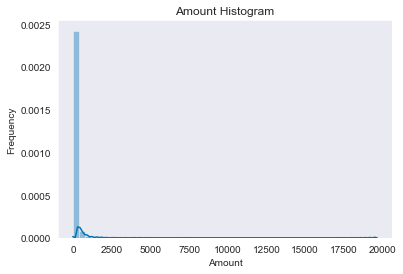

In [8]:
#distribution ofAmount
amount = [data['Amount'].values]
sns.distplot(amount)
plt.title('Amount Histogram')
plt.xlabel('Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

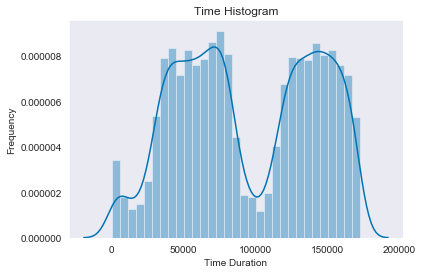

In [9]:
#distribution of time
plt.figure()
time = data['Time'].values
sns.distplot(time)
plt.title('Time Histogram')
plt.xlabel('Time Duration')
plt.ylabel('Frequency')

## Visualising the features

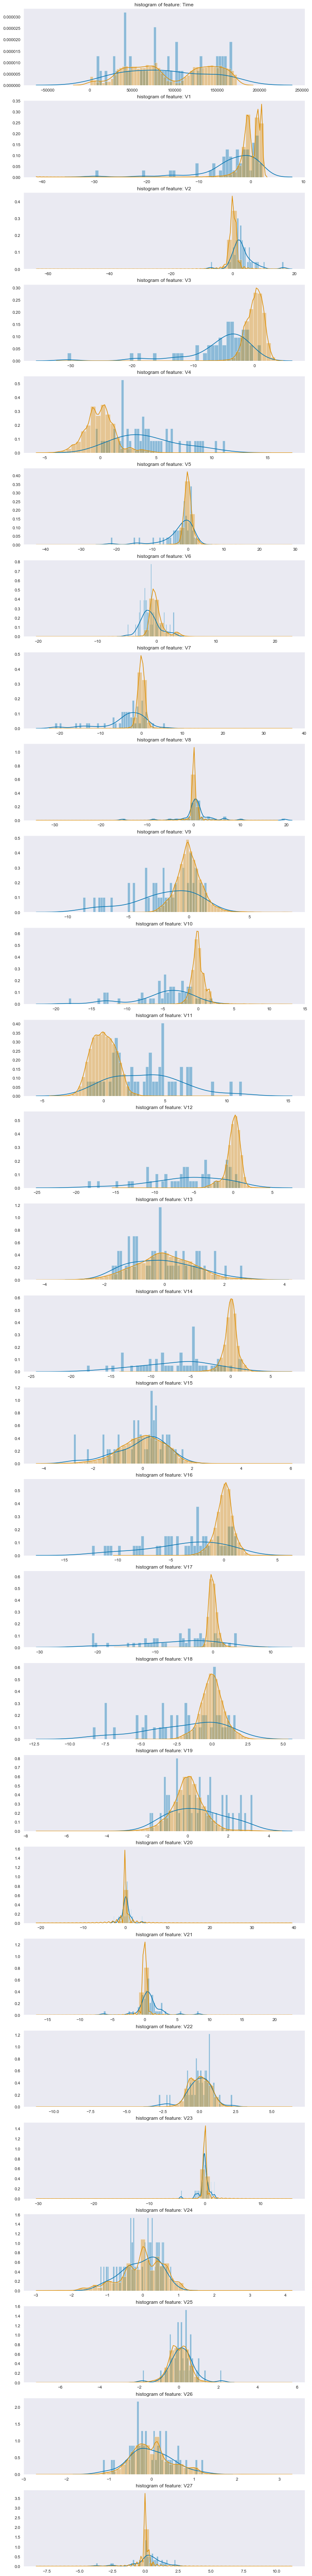

In [11]:
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1) #To create subplot inside figure 28 rows and 1 column
#data['Time'][data.Class == 1].shape
for i,f in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[f][data.Class == 1], bins=50)
    sns.distplot(data[f][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+ str(f))
plt.show()

## Analysing the above graphs:

- The orange section corresponds to Valid Transaction whereas Blue line     corresponds to Fraud transactions

- For Time: Here we can see how the distribution of fraudulent and non-     fraudulent transactions are distributed over time. Since both distributions overlap, it appears that cyber-criminals don’t have prefer time to engage in fraud. Additionally, we can tell that the predictive performance of the time variable would be low since it cannot distinguish between normal and fraudulent transactions. No matter what classifier you use, it most likely that the classifier won’t get much out of the time variable in terms of prediction of power.

- The distribution of V4 shows that the normal and fraudulent distributions don’t completely overlap. This should tell you that this feature haves more predictive power than the time variable.

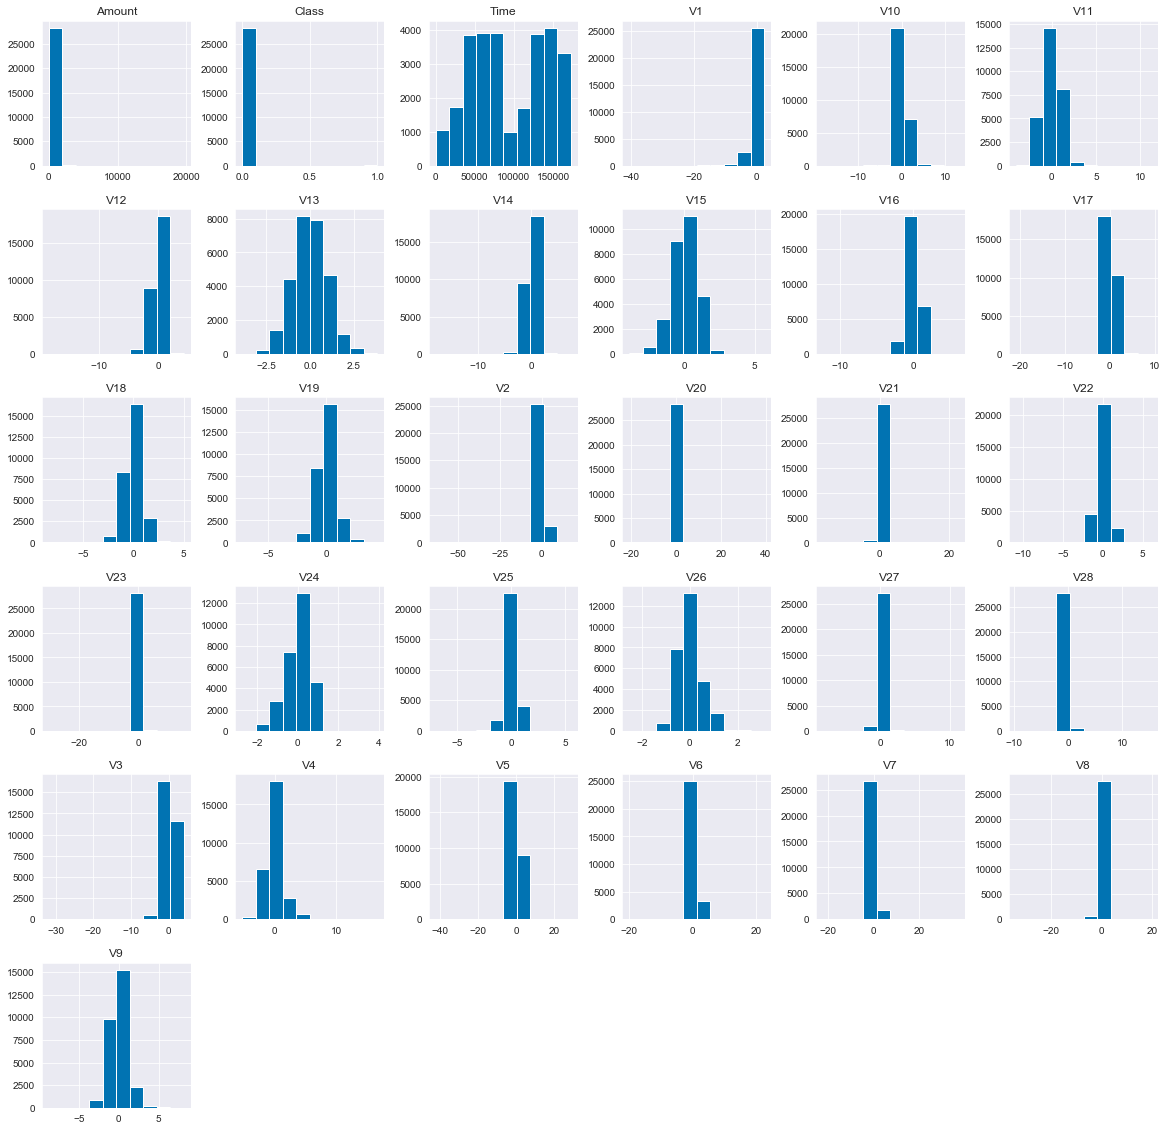

In [12]:
#plot histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

## Seperating the fraudulent cases from authentic ones

In [13]:
#Determine number of fraud cases in dataset
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432


The fraud data is highly unbalnced. Lets first try to find accuracy without balancing the dataset

In [14]:
print('Amount details of fraudulent transaction')
fraud.Amount.describe()

Amount details of fraudulent transaction


count      49.000000
mean      173.505306
std       387.996569
min         0.000000
25%         1.000000
50%         4.900000
75%       122.680000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
print('Details of valid transaction')
valid.Amount.describe()

Details of valid transaction


count    28432.000000
mean        89.813898
std        270.636594
min          0.000000
25%          5.990000
50%         22.380000
75%         78.820000
max      19656.530000
Name: Amount, dtype: float64

Since the average amount for fraudlent transaction is more then valid transactions it is crucial to deal with this problem.

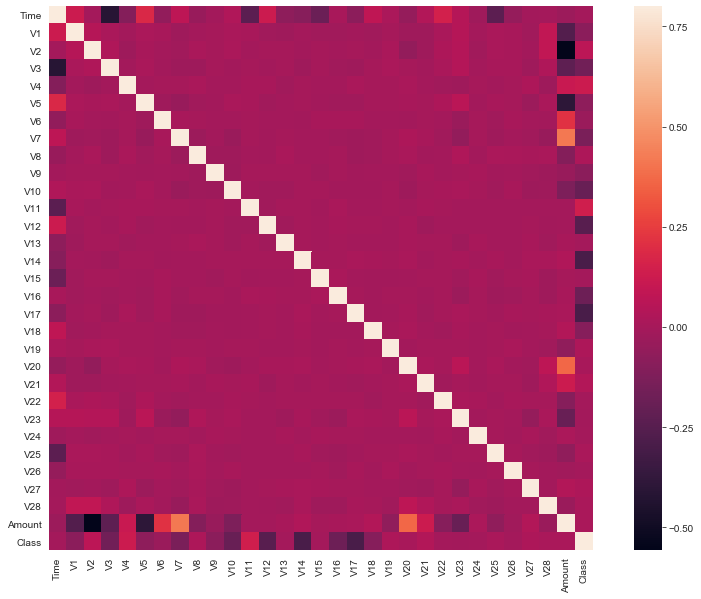

In [16]:
##Correlation Matrix to see if there are any strong co-relations between different variables in our dataset
#It will tell us about which features can be excluded and which features are important for overall classifications
corrmat = data.corr()
fig = plt.figure(figsize = (15,10))

sns.heatmap(corrmat,vmax=0.8,square = True)
plt.show()

## Analysing the Spearman's correlation matrix
- The color bar shows that variables with low correlations are colored in a Purple-black. As the correlation between variables increases the color goes from purple-black to white. Hence the diagonal elements. A correlation of 1 between variable 1 and variable 2 implies that we can obtain variable 1 from variable 2.
- Ideally, we will like to remove highly correlated variables for various reasons.
 1. Redundant features (highly correlated features) can be detrimental in the performance of some classifiers.
 2. Additionally, keeping highly correlated variables does not add any new information to our data.
 3. Finally, we reduce the complexity of your model which makes it more easy to understand.
- A low correlation value shows that variables are independent from each other. Is up to us to determine how much correlation we’re going to allow in your data set of features.
- In this case, if you were inspect the actual values you will notice that the highest correlation between two variables is 0.74 or so. This is not too high of a correlation. Typically, I set a cut off around 0.95. For example, if variable 1 and variable 2 had a correlation of 0.96, I will drop one variable and keep the other.
* Let’s keep all the variables since only a few of them are moderately correlated.

## Separate feature data (predictors) from labels

In [17]:
# feature data (predictors)
#seperating the X and the Y from the dataset
# feature data (predictors)
X = data.iloc[:, :-1]

# label class
y = data['Class']
print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


## Scaling the data values to standardize the range of independent variables

In [18]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.
#Scale the data to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

## Split the data into Training set and Testing set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

## Data Sampling
As noted earlier, the dataset is unbalanced. Training unbalanced dataset with learning algorithms may lead to misclassification of minority class. Therefore, to compensate for the unbalancedness, we will use ADASYN oversampling method as implemented in imbalanced-learn package to resample the dataset.
ADASYN (ADAptive SYNthetic) is an oversampling technique that adaptively generates minority data samples according to their distributions using K nearest neighbor.

In [20]:
# apply the ADASYN over-sampling
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 22742, 1: 42})
Resampled dataset shape Counter({0: 22742, 1: 22742})


## Train Models
Machine Learning Algorithms: Logistic Regression, Naive Baye, and RandomForest classifiers were trained using the processed feature data.

In [21]:
# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X_train, y_train=X_res, y_res 

# Train KNN Model
KNN_Classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNN_Classifier.fit(X_train, y_train)

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);


## Evaluate Model



========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  96.1%

Model Accuracy:  100.0%

Confusion Matrix:
 [[22742     0]
 [    0 22742]]



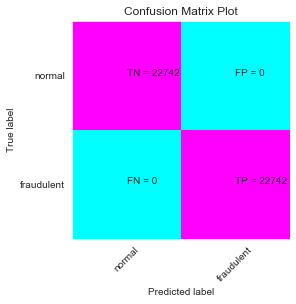


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22742
           1       1.00      1.00      1.00     22742

    accuracy                           1.00     45484
   macro avg       1.00      1.00      1.00     45484
weighted avg       1.00      1.00      1.00     45484


===== KNeighborsClassifier =====

Cross Validation Mean Score:  97.6%

Model Accuracy:  99.9%

Confusion Matrix:
 [[22698    44]
 [    0 22742]]



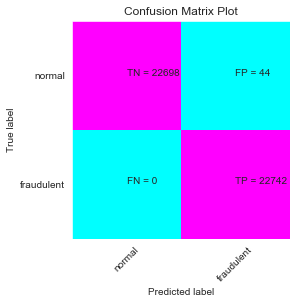


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22742
           1       1.00      1.00      1.00     22742

    accuracy                           1.00     45484
   macro avg       1.00      1.00      1.00     45484
weighted avg       1.00      1.00      1.00     45484


===== Naive Baiye Classifier =====

Cross Validation Mean Score:  88.7%

Model Accuracy:  92.2%

Confusion Matrix:
 [[21581  1161]
 [ 2390 20352]]



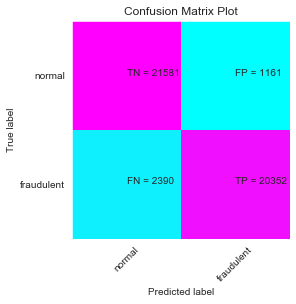


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     22742
           1       0.95      0.89      0.92     22742

    accuracy                           0.92     45484
   macro avg       0.92      0.92      0.92     45484
weighted avg       0.92      0.92      0.92     45484




In [23]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('KNeighborsClassifier', KNN_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 
classdict = {'normal':0, 'fraudulent':1}
print()

models = [j for j in modlist]
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.cool)
    print() 
    print("Classification Report:" "\n", classification) 
    print()

## Test Models


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[5687    3]
 [   3    4]]



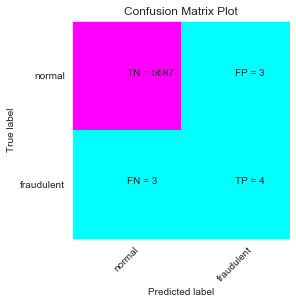


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.57      0.57      0.57         7

    accuracy                           1.00      5697
   macro avg       0.79      0.79      0.79      5697
weighted avg       1.00      1.00      1.00      5697


=== KNeighborsClassifier ===
Model Accuracy:  99.7%

Confusion Matrix:
 [[5677   13]
 [   2    5]]



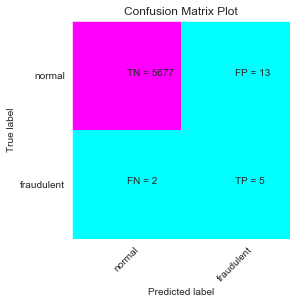


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.28      0.71      0.40         7

    accuracy                           1.00      5697
   macro avg       0.64      0.86      0.70      5697
weighted avg       1.00      1.00      1.00      5697


=== Naive Baiye Classifier ===
Model Accuracy:  94.69999999999999%

Confusion Matrix:
 [[5391  299]
 [   2    5]]



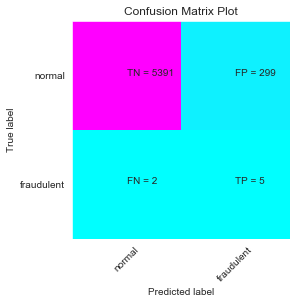


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      5690
           1       0.02      0.71      0.03         7

    accuracy                           0.95      5697
   macro avg       0.51      0.83      0.50      5697
weighted avg       1.00      0.95      0.97      5697




In [24]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.cool)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

============================= ROC Curve ===============================



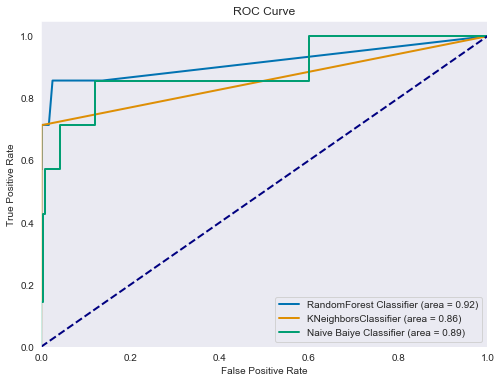

In [25]:
print('============================= ROC Curve ===============================' "\n")      
pf.plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)